In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('Dummy Data HSS.csv')

In [47]:
df.head(5).round(2)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.57,2.91,Mega,54.73
1,13.0,9.24,2.41,Mega,46.68
2,41.0,15.89,2.91,Mega,150.18
3,83.0,30.02,6.92,Mega,298.25
4,15.0,8.44,1.41,Micro,56.59


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [60]:
#fill null values using mean
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [62]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [63]:
df.duplicated().sum()

0

In [64]:
#remove duplicate data
df = df.drop_duplicates()

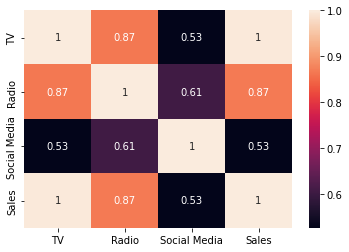

In [65]:
#we will see from this using numbers (Sales depend on Social Media (0.53) , Radio(0.87) & TV (1))
sns.heatmap(df.corr(),annot=True)

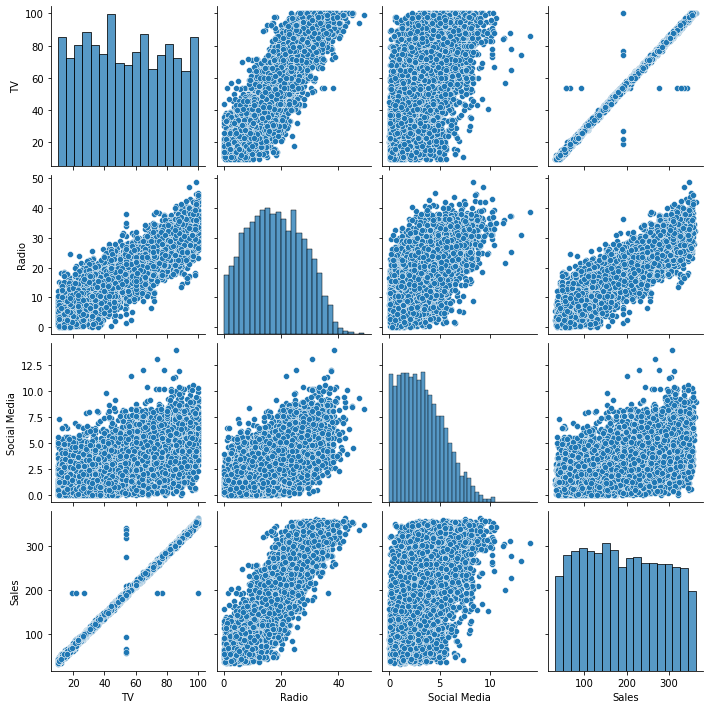

In [66]:
#using graph to see clearly (you will see TV with Sales higher)
sns.pairplot(df)

In [67]:
#make column Influencer as numeric data (you can do it with alot of usage like labelencoder , getdummeis & dictionary)
#I'll use labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Influencer'] = labelencoder.fit_transform(df['Influencer'])
df['Influencer'].values

array([1, 1, 1, ..., 2, 0, 2])

In [68]:
#devide dataset for X & y
X = df.iloc[:,0 : -1].round(2)
y = df.iloc[:,-1:].round(2)


In [69]:
#devied data ( 80% for training & 20% for testing)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
#build model and check score of model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9924519094609987